In [1]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime 

import quandl

import seaborn as sns

import sys

from scipy.stats import norm
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Analysis of the drivers of Stock

This script will investigate what drives the return, or can give a clue about the return, of stocks. The relationships which will be investigated is 

- P/E ratio
- Interest Rate
- Change in Interest Rate
- GDP growth
- Change in GDP Growth

We will use SP500 as stocks


## Data Import

In [33]:
PE = quandl.get("MULTPL/SP500_PE_RATIO_MONTH", authtoken="6rNSyTM5R4g7_B7XSyQW")
SP500_daily_tmp = yf.download('^GSPC')



[*********************100%***********************]  1 of 1 completed


In [67]:
look_back = 12*10

SP500_daily = SP500_daily_tmp['Close']
SP500 = pd.DataFrame(SP500_daily.resample('M').last())
SP500_ret = np.log(SP500/SP500.shift(look_back))
SP500_ret = SP500_ret.shift(-look_back) #shift to get coming 10 year returns





PE.index = pd.to_datetime(PE.index, errors='coerce')


SP500_ret.index = SP500_ret.index.strftime('%Y-%m')
PE.index = PE.index.strftime('%Y-%m')

## P/E ratio

In [74]:
PE_data = PE.join(SP500_ret)
PE_data = PE_data.dropna()
PE_data.columns = ['PE', 'Return']
PE_data.index = pd.to_datetime(PE_data.index)


PE_data = PE_data[PE_data['PE'] < 30]

PE_data = PE_data.resample('Y').last()

Correlation: -0.04147625818725891


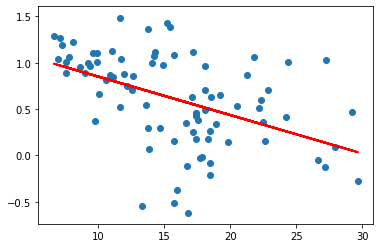

In [75]:
regressor = LinearRegression()  
regressor.fit(PE_data['PE'].values.reshape(-1,1), PE_data['Return'].values.reshape(-1,1))

y_pred = regressor.predict(PE_data['PE'].values.reshape(-1,1))

plt.scatter(PE_data['PE'], PE_data['Return'])
plt.plot(PE_data['PE'], y_pred, color='red', linewidth=2)

print("Correlation: " + str(float(regressor.coef_)))